#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 
4. Write your names here: SRINITHI S, VAISHNAVI J
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**

#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Normalize function 



In [2]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    # YOUR CODE HERE
    
    
    m = np.mean(X,axis=0)   # Mean of each axis of the input X. axis=0 in means first axis. 
    s = np.std(X,axis=0)    # Standard deviation of each axis of X.
    norm = (X-m)/s          # Normalization of X. Each element of the of X is operated with corresponding m and s of same axis. 
    return norm             # Returning normalized X as output.


    #raise NotImplementedError()

In [3]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [4]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s 
    '''
    # YOUR CODE HERE
    
    
    unit = np.ones((len(X),1),dtype='int')           # 1D array of ones of integer datatype with length equal to that of X
    X_final = np.hstack((X,unit))                    # Horizontally concatenates X with X1 
    y = np.dot(X_final,w)                            # Matrix multiplication of X_final and w to get the estimate y
    return y                                         # Returning predicted y as output for given X and w.


    #raise NotImplementedError()


In [5]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [6]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
    This allows us to call all loss functions with the same input format.
    
    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    # YOUR CODE HERE
    

    # Ones must be added to input X to account for the bias terms
    unit = np.ones((len(X),1),dtype='int')             # 1D array of ones of integer datatype with length equal to that of X
    X_final = np.hstack((X,unit))                      # Horizontally concatenates X with unit 
    y = np.array(np.dot(X_final,w))                    # Matrix multiplication of X_final and w to get the estimate y
    # Calculation of Mean Squared Error loss
    MSE_loss = (1/len(y))*(np.sum(((y-t)**2)))         # Sum of squares of diff between estimate and target upon no. of datasets
    return MSE_loss                                    # returning loss as output


    #raise NotImplementedError()

In [7]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [8]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
    # YOUR CODE HERE
    

    # Ones must be added to input X to account for the bias terms
    unit = np.ones((len(X),1),dtype='int')              # 1D array of ones of integer datatype with length equal to that of X
    X_final = np.hstack((X,unit))                       # Horizontally concatenates X with unit 
    y=np.array(np.dot(X_final,w))                       # Matrix multiplication of X_final and w to get the estimate y
    # Calculation of Mean Absolute Error loss
    MAE_loss =(1/(len(y)))*(np.sum(abs(y-t)))            # Sum of absolute diff between estimate and target upon no. of datasets
    return MAE_loss                                      # returning loss as output


    #raise NotImplementedError()

In [9]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [10]:
def L2_Loss (X, t, w, lamda): # Output should be a single number based on L2-norm (with sqrt)
    ''' Need to specify what inputs are'''
    # YOUR CODE HERE
    
    
    # L2 norm of w is the total loss obtained by adding the L2 regularised term with MSE loss
    MSE_loss=(MSE_Loss (X, t, w, lamda =0))       # Calling of MSE_Loss function to find the MSE loss
    r = np.sum(w[0:-1]**2)                        # L2 regularisation- sum of squares of w expect the bias term
    L2 = np.sqrt(r)*(lamda)                       # Square root of the L2 regularisation term and given lamda value multiplied 
    L2_loss = L2 + MSE_loss                       # Total loss = MSE loss + L2 regularisation term
    return L2_loss                                # Total loss is returned as output


    #raise NotImplementedError()

In [11]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [12]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    # YOUR CODE HERE
    

    # L1 norm of w is the total loss obtained by adding the L1 regularised term with MSE loss
    MSE_loss=(MSE_Loss (X, t, w, lamda =0))     # Calling of MSE_Loss function to find the MSE loss
    r = np.sum(abs(w[0:-1]))                    # L1 regularisation- sum of absolute values of w expect the bias term
    L1 = r * lamda                              # Product of Square root of the L1 regularisation term and given lamda value(extent of regularisation)
    L1_loss = L1 + MSE_loss                     # Total loss = MSE loss + L1 regularisation term
    return L1_loss                              # Total loss is returned as output


    #raise NotImplementedError()

In [13]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [14]:
def NRMSE_Metric (X, t, w, lamda=0): # Output should be a single number. RMSE/std_dev(t)
    # YOUR CODE HERE


    # NRMSE is the normalized root mean square error obtained by taking square root of MSE_loss and normalizing using standard deviation
    MSE_loss = MSE_Loss (X, t, w, lamda =0)      # Calling of MSE_Loss function to find the MSE loss
    RMSE = np.sqrt(MSE_loss)                     # Calculating root mean square error(RMSE) by taking square root of MSE loss
    s = t.std()                                  # Calculating standard deviation to normalize RMSE
    NRMSE = RMSE/s                               # Normalized root mean squared error (NRMSE) = RMSE divided by standard deviation
    return NRMSE                                 # NRMSE is returned as output
    
    
    raise NotImplementedError()

In [15]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w,0.5),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [16]:
def MSE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE


    unit = np.ones((len(X),1),dtype='int')              # 1D array of ones of integer datatype with length equal to that of X
    X_final = np.hstack((X,unit))                       # Horizontally concatenates X with unit 
    y=np.array(np.dot(X_final,w))                       # Matrix multiplication of X_final and w to get the estimate y
    g=np.zeros(len(w))                                  # Initialisation of gradient as an array of zeros 
    for j in range(0,len(w)):                           # 'For' loop for considering one training set of X at a time
        g[j]=(y-t).dot(X_final[:,j])                    # Gradient with respect Mean Squared error is calculated for each set 'j' of X
    return g                                            # Gradient is returned

    
    #raise NotImplementedError()

In [17]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [18]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    
    unit = np.ones((len(X),1),dtype='int')              # 1D array of ones of integer datatype with length equal to that of X
    X_final = np.hstack((X,unit))                       # Horizontally concatenates X with unit 
    y=np.array(np.dot(X_final,w))                       # Matrix multiplication of X_final and w to get the estimate y
    g=np.zeros(len(w))                                  # Initialisation of gradient as an array of zeros
    for j in range(0,len(w)):                           # 'For' loop for considering one training set of X at a time
        g[j]=(np.sign(y-t)).dot(X_final[:,j])/2         # Gradient with respect Mean Absolute error to is calculated for each set 'j' of X
    return g                                            # Gradient is returned
    
    #raise NotImplementedError()

In [19]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [20]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE


    grad=(MSE_Gradient(X,t,w))              # Calling of MSE_Gradient function to find the MSE gradient
    # Derivative of L2 regularisation term with respect to w calculation:
    d = np.sqrt(np.sum(w[0:-1]**2))         # Denominator term of the derivative is square root of the sum of squares of w
    n=np.zeros(len(w))                      # Initialisation of the numerator to zeros
    n[0:len(w)-1] = w[0:len(w)-1]           # Numerator of the derivative is w
    #
    ans= grad + lamda*(n/d)                 # L2 gradient is the MSE gradient + gradient of L2 regularisation term
    return ans                              # Total L1 gradient is returned


    #raise NotImplementedError()

In [21]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [22]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    
    grad=(MSE_Gradient(X,t,w))
    # Derivative of L1 regularisation with respect to w calculation:
    r =np.sign(w[0:len(w)-1])          # Derivative of w in L1 regularisation term
    L1=np.zeros(len(w))                # Initialisation of L1 regularisation gradient term
    L1[0:len(w)-1] = r * lamda         # L1 regularisation gradient term = Derivative of L1 regularisation * lamda
    #
    ans = L1+grad                      # Total gradient is MSE gradient + L1 regularisation gradient
    return ans                         # Total L1 gradient is returned

    
    #raise NotImplementedError()

In [23]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [24]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    # YOUR CODE HERE


    # We use gradient descent function to optimize weight(w) using the provided training data for given learning rate, lamda. 
    # Later the updated w is used in validation data and NRMSE is calculated to check how well the obtained w works

    # Using gradient descent for training data
    loss1 = lossfunc(X,t,w,lamda)                            # For given input of X,t,w (initial guess) and lamda, loss is obtained using the specified loss function
    iter,epsilon = 0, 100                                    # Two variables iter and epsilon are initialized to help in specifying stopping criteria for learning
    while iter <= max_iter and epsilon >= 1e-10:              # While loop checks if the stopping criteria is met. We stop the iteration if either the maximum no. of iteration specified is exceeded or if difference of two consecutive loss falls below specified threshold.  
      grad = gradfunc(X, t, w, lamda)                        # Gradient is evaluated using any of specified gradient functions defined previously
      w = w-lr*grad                                          # New best weight(w) is found using previous w, learning rate and gradient (Gradient descent method)
      loss2 = loss1                                          # Before computing the loss for updated w, we store the loss of previous w in new variable, as it is required later for comparison
      loss1 = lossfunc(X,t,w,lamda)                          # Loss for new w is calculated using specified loss function
      epsilon = abs(loss1-loss2)                             # Absolute difference between two consecutive loss values for two consecutive w is estimated. If this is less than specified threshold, iteration stops.
      iter+=1                                                # iter is increased by 1 to keep track of no. of iterations performed. If this exceeds max_iter specified, then we exit the loop. 
    train_loss_final = loss1                                 # final value of loss is stored as train_loss_final which is a demanded output
    
    # Using gradient descent for validation data
    validation_loss_final = lossfunc(X_val,t_val,w,lamda)    # loss is computed for given validation inputs using specified loss function
    w_final = w                                              # Last obtained w is stored for returning as output
    validation_NRMSE = NRMSE_Metric(X_val, t_val, w_final)   # Validation NRMSE is calculated using pre-defined function. It is also a demanded output  
    
    # returns all desired output from training and validation set
    print(w_final,train_loss_final,validation_loss_final,validation_NRMSE)
    return w_final,train_loss_final,validation_loss_final,validation_NRMSE   
    
    
    #raise NotImplementedError()
    #return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this.
    

In [25]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results = Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

[1.40058731 0.33104289 0.93040647] 689.9526658737369 23.637895078897937 9.69411723626606


## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

Here, the column of 1's in assumed to be included in X

In [26]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    # YOUR CODE HERE


    unit = np.ones((len(X),1),dtype='int')           # 1D array of ones of integer datatype with length equal to that of X
    X_final = np.hstack((X,unit))                    # 1D array of previous step is horizontally concatenated to input X
    Y = X_final.T.dot(X_final)                       # Matrix multiplication between X_final tanspose and X_final
    I = np.identity(Y.shape[0])                      # Identity square matrix of size same as rows of Y
    Z =  np.linalg.pinv(Y+lamda*I)                   # Inverse of (Y+lambda*I)
    pseudo_inverse = ((X_final.T).dot(t)).dot(Z)     # Matrix multiplication of X_final, t and Z
    return pseudo_inverse                            # Returns pseudo inverse of input matrix


    #raise NotImplementedError()

In [27]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#... Part 1 ends Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NRMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file, .py file, and .csv file as a single RollNo1_RollNo2_1.zip file.**


# PROBLEM IDEA FORMULATION

Getting a rough idea of the given problem by analysing the data


In [28]:
# Reading the provided training file and seeing what all columns are there

learning_data = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv')
learning_data.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2


In [29]:
# Analysing the size of the data provided to get a better feel of the problem
learning_data.shape

(6082, 22)

In [30]:
# Checking for presence of null values so that they can be eliminated
# Null values have no use in prediction and will lead to increased computation time
learning_data.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
dtype: int64

**OBSERVATION**   :  
We can see that all values are required to be included in our program

In [31]:
learning_data.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
count,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000
mean,29.801611,23.115291,56.018614,88.515941,29.614770,23.443802,7.139833,62.465128,0.371016,0.353386,0.303437,0.287287,0.579411,0.486801,0.252828,0.257101,37.544753,126.991630,61.872200,1.260263,5343.173788,30.303058
std,2.951021,2.401665,14.455890,7.312849,2.901865,2.310063,2.252380,33.111077,0.264576,0.259166,0.244996,0.251257,1.877036,1.751910,1.049527,1.154900,0.050415,0.079312,54.231137,1.372206,431.221299,3.097031
min,20.100000,11.300000,19.794666,58.936283,17.624954,14.720029,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000
25%,27.900000,21.500000,45.446830,84.404219,27.694146,21.925374,5.649959,37.250612,0.147001,0.137485,0.094394,0.072224,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4997.796875,28.400000
50%,29.900000,23.200000,54.158222,90.049240,29.693295,23.617270,6.571684,56.753248,0.317329,0.305546,0.246939,0.215075,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5445.730469,30.500000
75%,32.000000,24.800000,65.983959,94.024183,31.663208,25.104358,8.131577,84.760510,0.580648,0.555505,0.474692,0.486157,0.079479,0.028317,0.012658,0.000871,37.577600,127.042000,59.832400,1.767800,5729.980835,32.600000
max,37.600000,29.900000,98.524734,99.996887,37.050301,29.084492,21.857621,213.414006,0.967277,0.966997,0.983789,0.974710,23.701544,21.621661,15.841235,13.998953,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000


**OSERVATION**   :
Looking into the above data description we can see how each parameter varies and how their trends are

In [32]:
learning_data= learning_data.sample(frac = 1)
learning_data.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
3967,32.2,26.2,55.828007,95.862183,31.539253,23.819131,6.599190,119.692110,0.087770,0.115293,0.008808,0.051158,0.00000,0.00000,0.000000,0.000000,37.6181,127.004,146.5540,4.7296,5380.158691,34.9
5610,32.9,25.0,46.615067,90.375885,33.169555,26.004523,7.157313,91.154647,0.156578,0.051419,0.001840,0.000380,0.00000,0.00000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5245.199219,33.0
5887,32.2,26.4,64.911324,91.737434,28.944484,24.504042,5.862176,103.454758,0.345880,0.407272,0.218534,0.050978,0.00000,0.00000,0.000000,0.000000,37.6450,127.022,45.7160,2.5348,4679.124512,34.0
5489,33.2,24.7,49.911877,89.242279,33.386603,27.867494,5.746215,74.567476,0.367225,0.150426,0.252066,0.329300,0.08236,0.00014,0.000000,0.000342,37.6046,127.032,44.7624,0.5141,5247.996582,34.3
5774,32.5,23.5,54.377689,83.143707,32.920552,25.369539,5.201242,92.720334,0.047834,0.121767,0.183315,0.299410,0.00000,0.00000,0.701467,0.092443,37.4697,126.995,82.2912,2.2579,4861.894043,32.5


**OSERVATION**   :
Randomizing the given data so that while splitting between train and validation, we do not get similar kinds of data in the same group.

This step is very necessary if we have data in some sorted format to improve the machine's learning capacity

# DATA SPLITING

From the given set of data we split them into training and validation data.

Also we have to separate the target variable given and the design variables. 

This splitting of data, and normalizing the segregated data will be done in this section.



In [33]:
train_size=round(0.8*len(learning_data))
val_size = round(0.2*len(learning_data))
train_data = learning_data[:train_size]
val_data = learning_data[train_size:]


80 % of data is used for training
20 % of data is used for validation 

In [34]:
m = np.mean(train_data,axis=0)   # Mean of each axis of the input X. axis=0 in means first axis. 
s = np.std(train_data,axis=0)    # Standard deviation of each axis of X.
n_train = (train_data-m)/s 
n_val = (val_data-m)/s 

Training and validation data are normalized with respect to the mean and standard deviation of training data

In [35]:
# Separate the column of target from the variables
X_train, t_train = n_train.drop(columns='Next_Tmax').copy(), train_data['Next_Tmax'].copy()
X_valid, t_valid = n_val.drop(columns='Next_Tmax').copy(), val_data['Next_Tmax'].copy()


# SUPPORTING FUNCTIONS

GRADIENT DESCENT

In [36]:
# This fuction uses gradient descent and gives all the required outputs to find the best hyperparameters

def Grad_Descent(X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    # YOUR CODE HERE
    
    loss2 = lossfunc(X,t,w,lamda)
    iter,e = 0, 1
    while iter <= max_iter and e >= epsilon:
      grad = gradfunc (X, t, w, lamda)
      w = w-lr*grad
      loss1=loss2
      loss2= lossfunc(X,t,w,lamda)
      e = abs(loss1-loss2)
      iter+=1
    train_loss_final = loss2
    train_RMSE = np.sqrt(train_loss_final)
    
    #
    #Validation
    loss2_val = lossfunc(X_val,t_val,w,lamda)
    validation_loss_final = loss2_val
    w_final=w
    #
    validation_RMSE=np.sqrt(validation_loss_final)
    validation_NRMSE= NRMSE_Metric (X_val, t_val, w_final,lamda)
    train_NRMSE= NRMSE_Metric (X, t, w_final,lamda)
    
    #raise NotImplementedError()
    return w_final, train_RMSE, validation_RMSE, train_NRMSE, validation_NRMSE #You should return variables structured like this.

# USING L1 LOSS

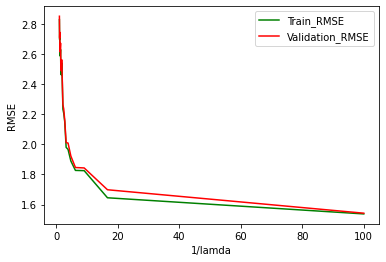

[1.53817612 1.64538584 1.82549557 1.82715883 1.88941862 1.96646802
 1.98048806 2.14910102 2.20737028 2.23410024 2.42252148 2.5417513
 2.46171388 2.47726299 2.63037646 2.59682392 2.58805738 2.71706898
 2.69707144 2.82854866] [1.5429958  1.69868715 1.84354062 1.84642662 1.92236603 2.00873494
 2.01208053 2.15950701 2.23557968 2.26426233 2.43943521 2.56232762
 2.48972429 2.50002188 2.67265337 2.63910207 2.61565487 2.7444072
 2.70868062 2.85119765] [0.50028094 0.51911919 0.51920374 0.5050699  0.49784651 0.51126557
 0.50949067 0.51195953 0.51472982 0.51549201 0.49697715 0.51334559
 0.53052612 0.50825736 0.544308   0.51697706 0.48584683 0.49589894
 0.48899223 0.49723251]


In [37]:
l = np.arange(0.01,1,0.05) 
train_RMSE_L1=np.zeros((len(l)))
val_RMSE_L1=np.zeros((len(l)))
val_NRMSE_L1=np.zeros((len(l)))
train_NRMSE_L1=np.zeros((len(l)))
w_f_L1=np.zeros((len(l),X_train.shape[1]+1))
lr =  1e-5
max_iter = 100
epsilon = 1e-5
i=0

for lamda in l: 
  w = 1*np.random.rand(X_train.shape[1]+1)-5 
  w=(w-np.mean(w))/(np.std(w))
  w_f_L1[i,:], train_RMSE_L1[i], val_RMSE_L1[i] ,train_NRMSE_L1[i], val_NRMSE_L1[i] = Grad_Descent (X_train, X_valid, t_train, t_valid, w, lamda, max_iter, epsilon, lr, L1_Loss ,L1_Gradient)
  i+=1

plt.plot(1/l,train_RMSE_L1,'g-',label="Train_RMSE")
plt.plot(1/l,val_RMSE_L1,'r-',label="Validation_RMSE")
plt.xlabel('1/lamda')
plt.ylabel('RMSE')
plt.legend()

plt.show()
print(train_RMSE_L1, val_RMSE_L1, val_NRMSE_L1)



In [38]:
i = np.where(min(val_RMSE_L1))
w_L1 = w_f_L1[i,:]
print("Best lamda near to: ",l[i])
print("Validation: ",min(val_RMSE_L1))

Best lamda near to:  [0.01]
Validation:  1.5429957972644741


# USING L2 LOSS

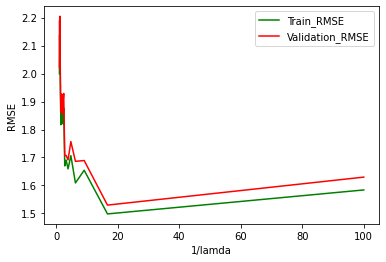

[1.58385633 1.49812773 1.65424089 1.60887229 1.70641106 1.65920028
 1.69054972 1.66984393 1.87618387 1.82034368 1.83399272 1.88120272
 1.8815687  1.8169439  1.90132973 1.98454912 2.1575409  2.04996739
 2.13780493 1.99981655] [1.62973624 1.52964161 1.68901601 1.68617942 1.75689493 1.69121756
 1.7073857  1.70639779 1.92891377 1.89259098 1.8560584  1.92677675
 1.90278727 1.86396747 1.93157986 2.02778067 2.20504507 2.08491416
 2.18993336 2.02197405] [0.53421806 0.48975006 0.53381484 0.5261153  0.53434275 0.49542644
 0.48747892 0.49576973 0.55477108 0.54360812 0.51184071 0.52579486
 0.51573654 0.50741556 0.51786462 0.53401898 0.51715378 0.53075234
 0.55182869 0.51137121]


In [39]:
l = np.arange(0.01,1,0.05) 
train_RMSE_L2=np.zeros((len(l)))
val_RMSE_L2=np.zeros((len(l)))
val_NRMSE_L2=np.zeros((len(l)))
train_NRMSE_L2=np.zeros((len(l)))
w_f_L2=np.zeros((len(l),X_train.shape[1]+1))
lr =  1e-5
max_iter = 100
epsilon = 1e-5
i=0

for lamda in l: 
  w = 1*np.random.rand(X_train.shape[1]+1)-5 
  w=(w-np.mean(w))/(np.std(w))
  w_f_L2[i,:], train_RMSE_L2[i], val_RMSE_L2[i] ,train_NRMSE_L2[i], val_NRMSE_L2[i] = Grad_Descent (X_train, X_valid, t_train, t_valid, w, lamda, max_iter, epsilon, lr, L2_Loss ,L2_Gradient)
  i+=1

plt.plot(1/l,train_RMSE_L2,'g-',label="Train_RMSE")
plt.plot(1/l,val_RMSE_L2,'r-',label="Validation_RMSE")
plt.xlabel('1/lamda')
plt.ylabel('RMSE')
plt.legend()

plt.show()
print(train_RMSE_L2, val_RMSE_L2, val_NRMSE_L2)




In [40]:
i = np.where(min(val_RMSE_L2))
w_L2 = w_f_L2[i,:]
w_L2 = w_L2[0,0,:]
print("Best lamda near to: ",l[i])
print("Validation: ",min(val_RMSE_L2))


Best lamda near to:  [0.01]
Validation:  1.5296416119653906


We can hence finalize the best lamda to be 0.1

Both L1 loss and L2 loss gives the same result

# PSEUDO INVERSE

In [41]:
# computing MRSE for Lamda ranges from 1e-5 to 1e+5 (wide Range)

l_p = np.arange(0.01,1,0.05) 
train_RMSE_p = []
val_RMSE_p= []
val_NRMSE_p = []
val_NRMSE_p = []

for lamda in l_p:
    w_p = Pseudo_Inverse(X_train,t_train,lamda)
    train_RMSE_p.append(np.sqrt(MSE_Loss (X_train, t_train, w_p, lamda =0)))
    val_RMSE_p.append(np.sqrt(MSE_Loss (X_valid, t_valid, w_p , lamda =0)))
    val_NRMSE_p.append(NRMSE_Metric(X_valid, t_valid, w_p, lamda=0))



In [42]:
i = np.where(min(val_RMSE_p))
print("Best lamda near to: ",l[i])
print("Validation: ",min(val_RMSE_p))


Best lamda near to:  [0.01]
Validation:  1.4374138590774665


# Prediction using test data


In [44]:
# Predicting

X_test = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv')
#X_test = testing_data.to_numpy()
#X_test.head()
m_t = m[:len(m)-1]
s_t = s[:len(s)-1]
X_test_normalize = (X_test-m_t)/s_t
unit = np.ones((len(X_test_normalize),1),dtype='int')           # 1D array of ones of integer datatype with length equal to that of X
X_test_normalize = np.hstack((X_test_normalize,unit))

y=np.dot(X_test_normalize,w_L2)
raw_data = {'Next_Tmax': y}
df = pd.DataFrame(raw_data, columns = ['Next_Tmax'])

df.to_csv('213010036_213010037_1.csv',index=False)

**REFERRED FRIENDS**

193010023_203010030 

**REFERRED ONLINE SOURCES**

Wikepedia for basic 

https://www.toptal.com/machine-learning/machine-learning-theory-an-introductory-primer

https://machinelearningmastery.com/linear-regression-for-machine-learning/

# This is formatted as code
```

#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code): 
2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code): 